# Create a grid of model systems and calculate astrophysical timescales


In [4]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
sys.path.append('/Users/clairewilliams/Research/Calculations/model-timescales/src')

from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


First, create a grid of systems using the grid building function. The arrays of mass, radius, and velocity correspond to the bulk properties of the system

In [5]:
masses_array   = np.logspace(4, 8, 10) * u.Msun
radii_array    = np.logspace(-0.7, 2, 10) * u.pc
velocity_array = np.logspace(-0.7, 2.2, 10) * u.km/u.s

grid = build_bulk_energy_grid(masses_array, radii_array, velocity_array,
                              alpha=3/5, energy_unit=u.erg)


# Example: access aligned arrays
M = grid['M']   # Msun
R = grid['R']   # pc
V = grid['V']   # km/s
K = grid['K']   # erg
U = grid['U']   # erg

print(len(M), len(R), len(V), len(K), len(U))  # -> 1_000_000 each (100*100*100


167 167 167 167 167


Now, create a TimescaleEnsemble object, which will fill in the desired internal structure of each object given the bulk properties and a model for the density profile (in this case power law)

In [6]:
model1 = TimescaleEnsemble(grid, densityModel="power-law")

Visualize the structure of any object in the grid: 

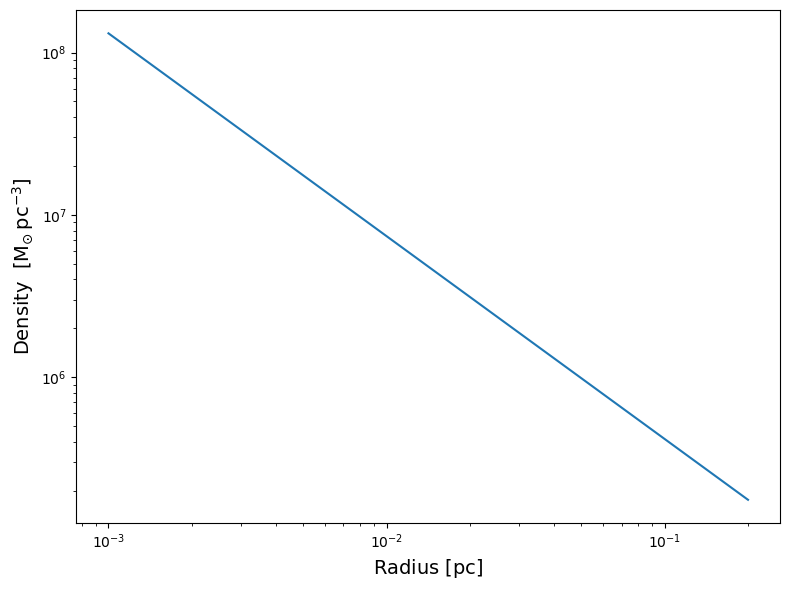

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[0]
yaxis = model1.rho[0]
ax.plot(xaxis,yaxis)

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Density  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

Calculate an astrophysical timescale for any object in the grid: 

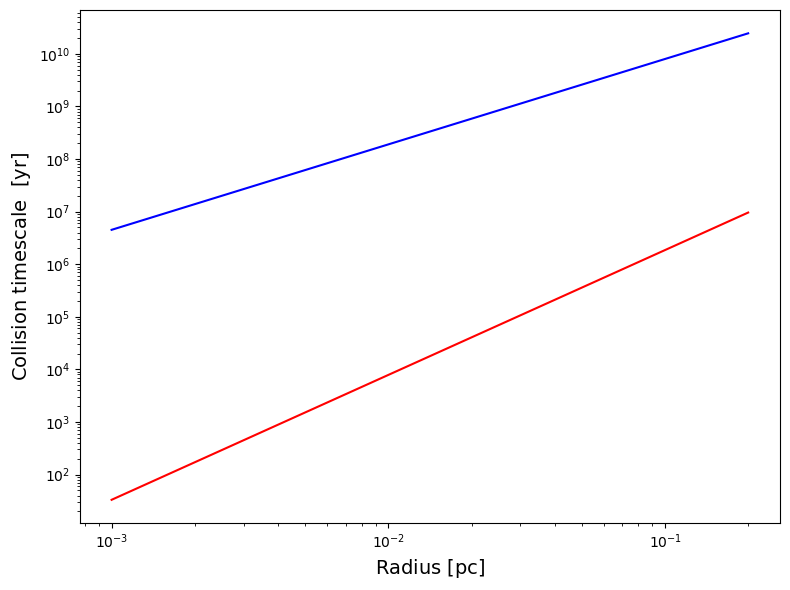

In [8]:
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

Or see them all

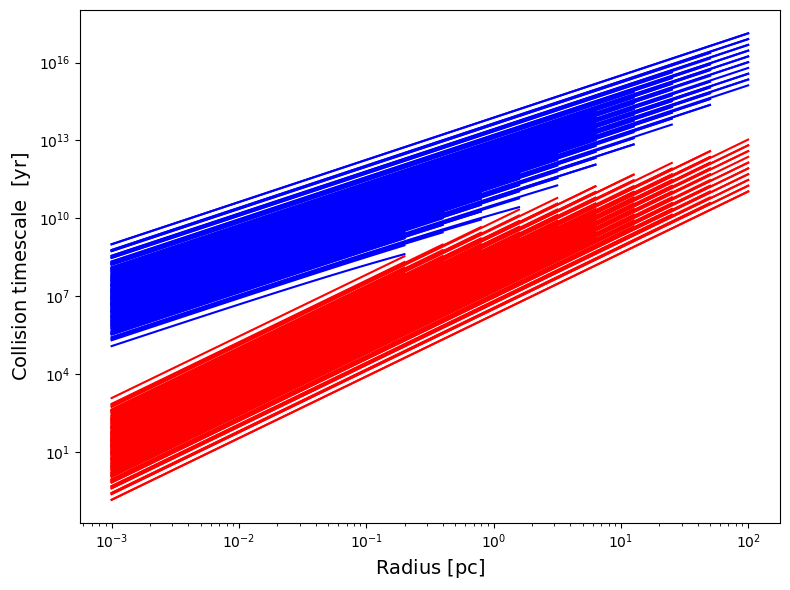

In [9]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
for system_id in range(model1.Nsystems):
    t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

    t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

    xaxis = model1.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

In [10]:
model2 = TimescaleEnsemble(grid, densityModel="power-law", alpha=1.75)

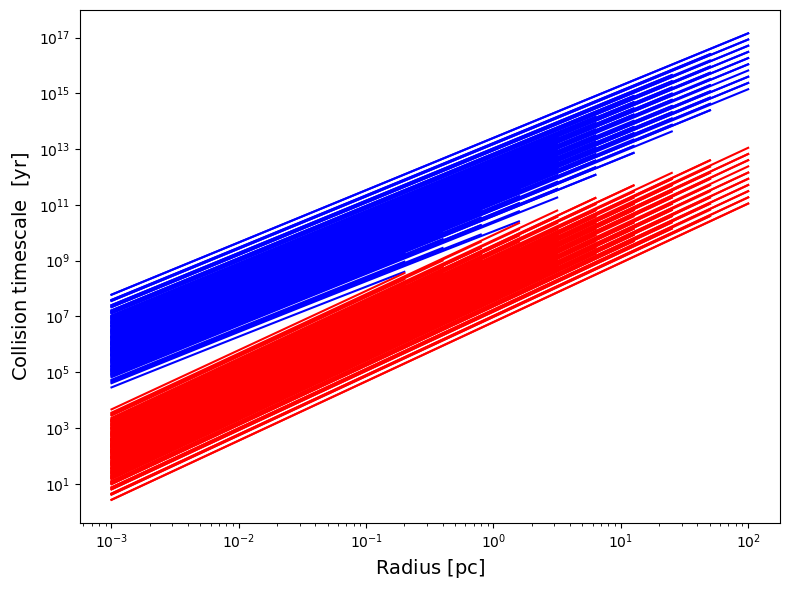

In [11]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
for system_id in range(model2.Nsystems):
    t_coll = collision_timescale(model2.n[system_id], model2.sigma[system_id], model2.Mstar, e =0.9, alpha = model2.alpha).to('yr')

    t_relax = relaxation_timescale(model2.sigma[system_id], model2.rho[system_id],model2.Mstar).to('yr')

    xaxis = model2.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

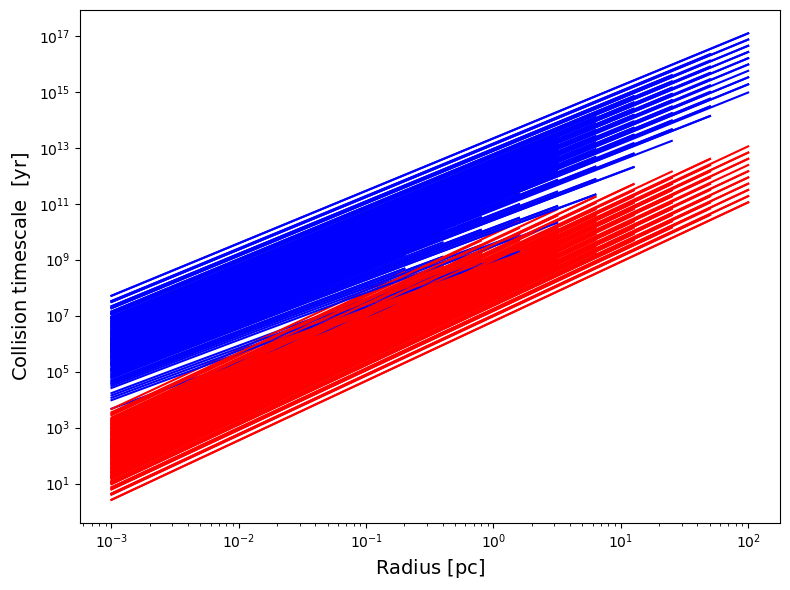

In [12]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
for system_id in range(model2.Nsystems):
    t_coll = collision_timescale(model2.n[system_id], model2.sigma[system_id], model2.Mstar, e =0.999, alpha = model2.alpha).to('yr')

    t_relax = relaxation_timescale(model2.sigma[system_id], model2.rho[system_id],model2.Mstar).to('yr')

    xaxis = model2.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

Alternatively, create a table of all timescales in all systems at all radii and compare them:

In [13]:
table5 = generate_timescale_comparison(model1, as_ = 'pandas')


Using ensemble value of Mstar: 1.0 solMass


In [14]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,4099521.9680255395 yr,33.139273930283835 yr,0.002174850817599202,0.0,8.08369224235302e-06,301756762.1136578,2439.3087969757407,t_relax,10000000000.0 yr
1,0,0.00132145576997553 pc,6448270.785098868 yr,64.24554075848704 yr,0.002414483317311986,0.0,9.963220047605677e-06,155652826.35867563,1550.803360043242,t_relax,10000000000.0 yr
2,0,0.001746245352001619 pc,10142691.223588921 yr,124.5497869396157 yr,0.0026805193452364125,0.0,1.2279757334024866e-05,80289177.89195581,985.9316210615716,t_relax,10000000000.0 yr
3,0,0.00230758599619549 pc,15953758.18803611 yr,241.458772757772 yr,0.0029758681323943975,0.0,1.513491491546139e-05,41414937.57210411,626.8115563829408,t_relax,10000000000.0 yr
4,0,0.0030493728293872584 pc,25094158.52752042 yr,468.10468628063904 yr,0.003303759458829597,0.0,1.865393038651904e-05,21362742.76477715,398.4991163992663,t_relax,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
3335,166,8.858667904100823 pc,24510703641844.754 yr,34106958199.88864 yr,0.028522831089866425,0.0,0.001391512814085889,0.29319530464703386,0.0004079850234461636,t_ms,10000000000.0 yr
3336,166,16.23776739188721 pc,65581945869408.83 yr,143827850154.77847 yr,0.035799490072377094,0.0,0.002193101291034855,0.06952756360634349,0.00015248098950757988,t_ms,10000000000.0 yr
3337,166,29.763514416313193 pc,175426898958061.3 yr,606517015059.203 yr,0.04493254843477141,0.0,0.0034573775097295704,0.01648758361548008,5.700380078194659e-05,t_ms,10000000000.0 yr
3338,166,54.555947811685144 pc,469055925863797.9 yr,2557661045204.06 yr,0.05639560521005542,0.0,0.005452784847550868,0.003909822225564749,2.1319419388177073e-05,t_ms,10000000000.0 yr
